# Analysis of Tipping Behavior

## I - Introduction

In the food service industry, understanding the factors that influence tipping behavior can help businesses optimize their service and maximize gratuities. This project aims to explore and determine the best days for getting tips, with a specific focus on factors such as Location, Order Price, and Weather.

### Problem Statement
Tipping behavior is influenced by various factors, including the day of the week, weather conditions, and location. The findings of this project have helped me maximize tips earned while I was working as a delivery driver.

### Hypothesis
Our first hypothesis is that the day of the week impacts the amount of tips received, with weekend days having more tips than other days.

Our second hypothesis is that the location, represented by area codes, significantly impacts the amount of tips received. Specifically, we expect that certain areas will have higher average tip amounts due to demographic and socioeconomic factors such as average income.

Our third hypothesis will explore the affect that the weather conditions have on tips.

Our foruth hypothesis is that as the order price increases the tips increase.


### Objectives
1. **Data Understanding and Cleaning:** To inspect and preprocess the dataset, ensuring it is suitable for analysis.
2. **Exploratory Data Analysis (EDA):** To visualize and understand the distribution of tips.
3. **Testing Hypothesis:** To employ statistical methods to test our hypothesis.
4. **Reporting Findings:** To summarize the insights and provide recommendations for optimizing tipping strategies based on several factors.

By the end of this project, we aim to provide actionable insights into which days and locations are best for maximizing tips.


## II - Data Collection and Loading

In [64]:
import pandas as pd

df = pd.read_csv('delivery_tips_data1.csv',
                 sep=";"
                )

df.head(5)

,Date,Tip Amount,Order Price,Weather Conditions,Area Code
0,2021-06-01,0.0,25.98,Cloudy,28203
1,2021-06-01,1.0,13.60,Sunny,28213
2,2021-06-01,2.0,16.27,Cloudy,28205
3,2021-06-01,1.0,26.06,Cloudy,28207
4,2021-06-01,0.0,20.72,Cloudy,28197


## III - Data Cleaning

In [65]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

missing_values, data_types


(Date                  0
 Tip Amount            0
 Order Price           0
 Weather Conditions    0
 Area Code             0
 dtype: int64,
 Date                   object
 Tip Amount            float64
 Order Price           float64
 Weather Conditions     object
 Area Code               int64
 dtype: object)

## IV - Exploratory Data Analysis (EDA)

In [66]:
# Summary statistics
tip_summary_statistics = df["Tip Amount"].describe()
order_price_summary_statistics = df["Order Price"].describe()

# Print summary statistics
print("Tip Amount Summary Statistics:\n", tip_summary_statistics)
print("\nOrder Price Summary Statistics:\n", order_price_summary_statistics)


Tip Amount Summary Statistics:
 count    258.000000
mean       1.083333
std        1.067668
min        0.000000
25%        0.000000
50%        1.000000
75%        1.500000
max        5.000000
Name: Tip Amount, dtype: float64

Order Price Summary Statistics:
 count    258.000000
mean      20.407209
std        5.786272
min        0.070000
25%       16.585000
50%       20.430000
75%       24.150000
max       38.040000
Name: Order Price, dtype: float64


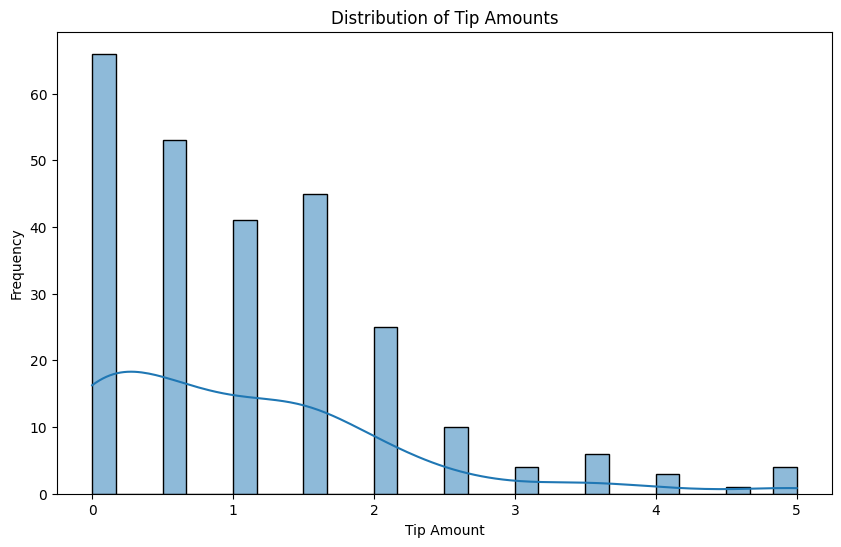

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of tips
plt.figure(figsize=(10, 6))
sns.histplot(df['Tip Amount'], bins=30, kde=True)
plt.title('Distribution of Tip Amounts')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

## V - Testing Hypothesis
### Tips v. DayofWeek

In [68]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day of Week'] = df['Date'].dt.day_name()
# To ensure the days are ordered from Monday to Sunday
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=[
                                   'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

In [69]:
df.sample(10)

,Date,Tip Amount,Order Price,Weather Conditions,Area Code,Day of Week
38,2021-06-04,1.0,21.37,Cloudy,28197,Friday
180,2021-06-14,1.5,20.50,Rainy,28205,Monday
126,2021-06-10,0.5,12.82,Cloudy,28211,Thursday
76,2021-06-07,0.0,32.85,Rainy,28199,Monday
213,2021-06-17,1.5,18.83,Cloudy,28207,Thursday
152,2021-06-12,1.0,24.28,Rainy,28197,Saturday
93,2021-06-08,1.0,23.66,Sunny,28199,Tuesday
242,2021-06-19,0.0,29.38,Sunny,28213,Saturday
95,2021-06-08,0.5,27.09,Sunny,28207,Tuesday
173,2021-06-14,1.0,18.55,Sunny,28213,Monday


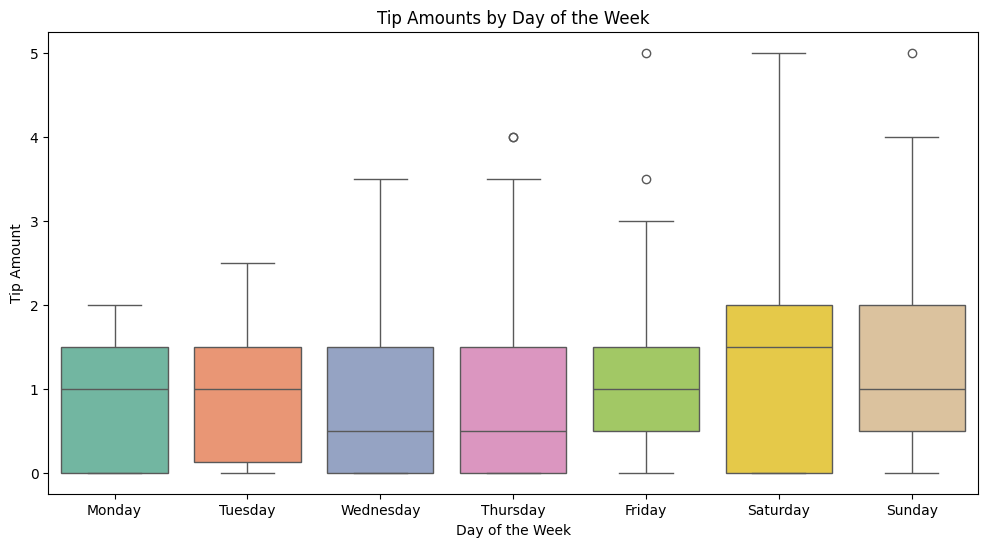

In [70]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day of Week'] = df['Date'].dt.day_name()

# To ensure the days are ordered from Monday to Sunday
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=[
                                   'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Plotting the boxplot with the correct order of days
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day of Week', y='Tip Amount', data=df, hue='Day of Week', palette="Set2")
plt.title('Tip Amounts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')
plt.show()



C:\Users\Perso\AppData\Local\Temp/ipykernel_18048/2256194336.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_by_day = df.groupby('Day of Week')['Tip Amount'].sum().reindex(


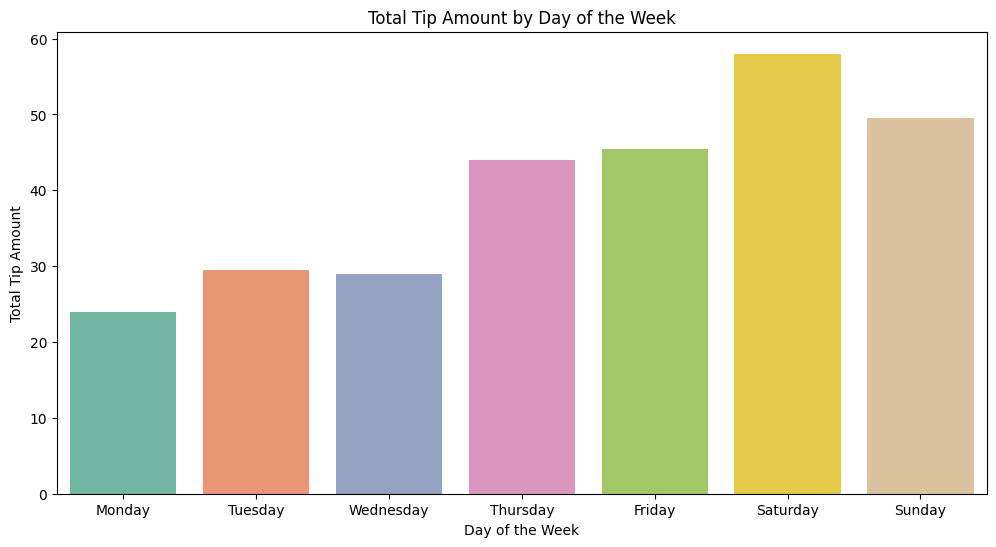

In [71]:
# Group by day of the week and calculate the total tip amount for each day
tips_by_day = df.groupby('Day of Week')['Tip Amount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the total tip amount by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=tips_by_day.index, y=tips_by_day.values, hue=tips_by_day.index, palette="Set2")
plt.title('Total Tip Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Tip Amount')
plt.show()

The analysis reveals significant differences in the spread and central tendencies of the data across the seven days of the week. Saturday and Sunday show the highest variability and higher medians, suggesting greater dispersion and central tendency in these days compared to others. Monday, Tuesday, and Thursday have less variability and lower medians, indicating more consistent but lower central tendencies. 

### Tips v. Location

<img src="Bremen_location_map_simplified.png" alt="Description" width=500>


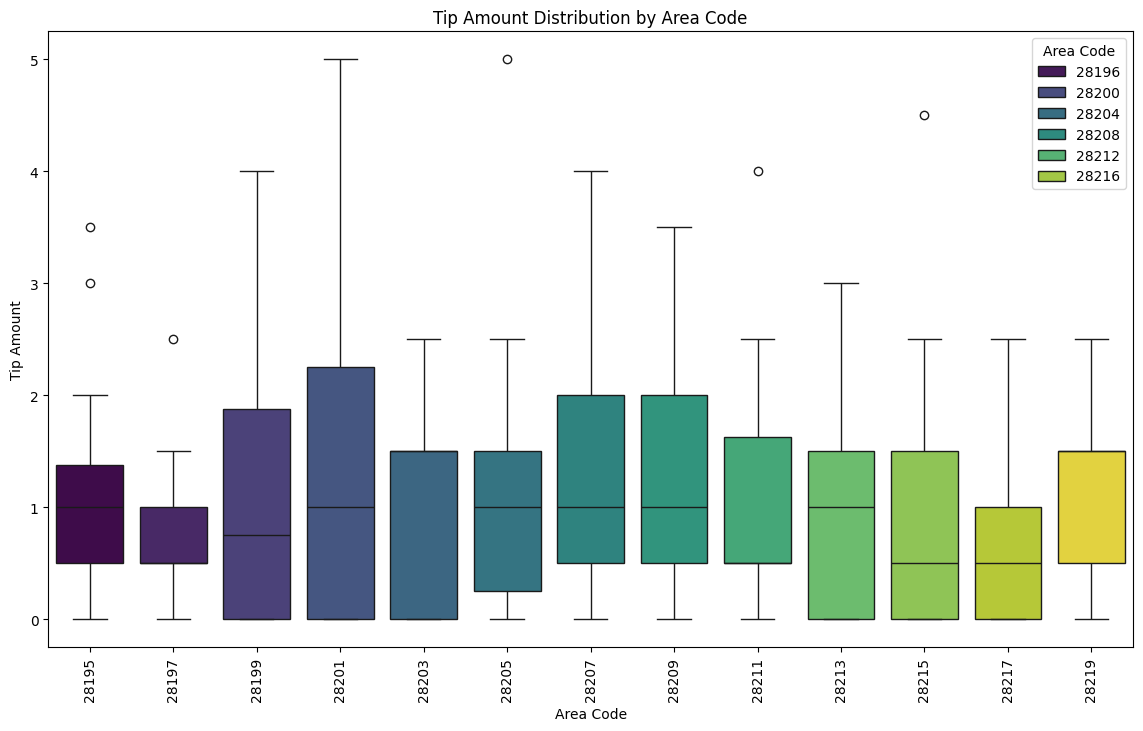

In [72]:
# Boxplots to see the distribution within each area code
plt.figure(figsize=(14, 8))
sns.boxplot(x='Area Code', y='Tip Amount', data=df, hue='Area Code', palette='viridis')
plt.title('Tip Amount Distribution by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Tip Amount')
plt.xticks(rotation=90)
plt.show()

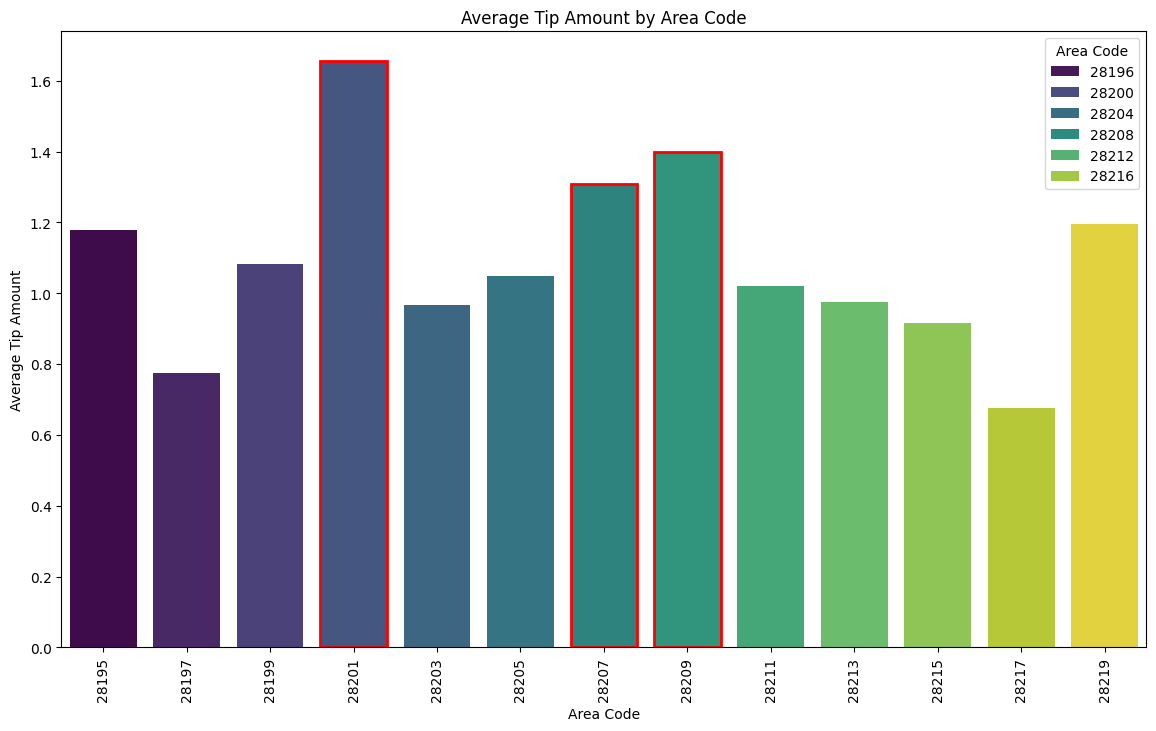

In [73]:
# Group by area code and calculate the mean tip amount
tips_by_area = df.groupby('Area Code')['Tip Amount'].mean().reset_index()

# Find the top three area codes with the highest average tips
top_three_areas = tips_by_area.nlargest(3, 'Tip Amount')['Area Code']

# Plotting the mean tip amount by area code
plt.figure(figsize=(14, 8))
bars = sns.barplot(x='Area Code', y='Tip Amount', data=tips_by_area, hue='Area Code', palette='viridis')
plt.title('Average Tip Amount by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Average Tip Amount')
plt.xticks(rotation=90)

# Highlight the top three areas with a red border
for bar, area in zip(bars.patches, tips_by_area['Area Code']):
    if area in top_three_areas.values:
        bar.set_edgecolor('red')
        bar.set_linewidth(2)

plt.show()



The plot highlights the top three area codes with the highest average tip amounts with a red border. Let's explore why some areas rank higher than others.

We speculate that demographic and socioeconomic factors such as average income play a significant role. Below we will test this hypothesis.

In [74]:
tips_by_area

,Area Code,Tip Amount
0,28195,1.178571
1,28197,0.775000
2,28199,1.083333
3,28201,1.656250
4,28203,0.966667
5,28205,1.048387
6,28207,1.309524
7,28209,1.400000
8,28211,1.020833
9,28213,0.975000


In [75]:
df_TipsIncome = pd.read_csv('TableTipsIncome.csv', sep=";")
df_TipsIncome

,Name,Postal Code,Average Income
0,Mitte,28195,35054
1,Woltmershausen,28197,22609
2,Neustadt,28199,24042
3,Neustadt,28201,23864
4,Östliche Vorstadt,28203,31492
5,Östliche Vorstadt,28205,30600
6,Hemelingen,28207,25895
7,Schwachhausen,28209,55400
8,Schwachhausen,28211,53876
9,Schwachhausen,28213,38847


Source: https://www.statistik.bremen.de/datenangebote/stadtteil-und-ortsteiltabellen-4529

In [76]:
# Merging the dataframes on the common area code
merged_df = pd.merge(tips_by_area, df_TipsIncome, left_on="Area Code", right_on="Postal Code")
merged_df

,Area Code,Tip Amount,Name,Postal Code,Average Income
0,28195,1.178571,Mitte,28195,35054
1,28197,0.775000,Woltmershausen,28197,22609
2,28199,1.083333,Neustadt,28199,24042
3,28201,1.656250,Neustadt,28201,23864
4,28203,0.966667,Östliche Vorstadt,28203,31492
5,28205,1.048387,Östliche Vorstadt,28205,30600
6,28207,1.309524,Hemelingen,28207,25895
7,28209,1.400000,Schwachhausen,28209,55400
8,28211,1.020833,Schwachhausen,28211,53876
9,28213,0.975000,Schwachhausen,28213,38847


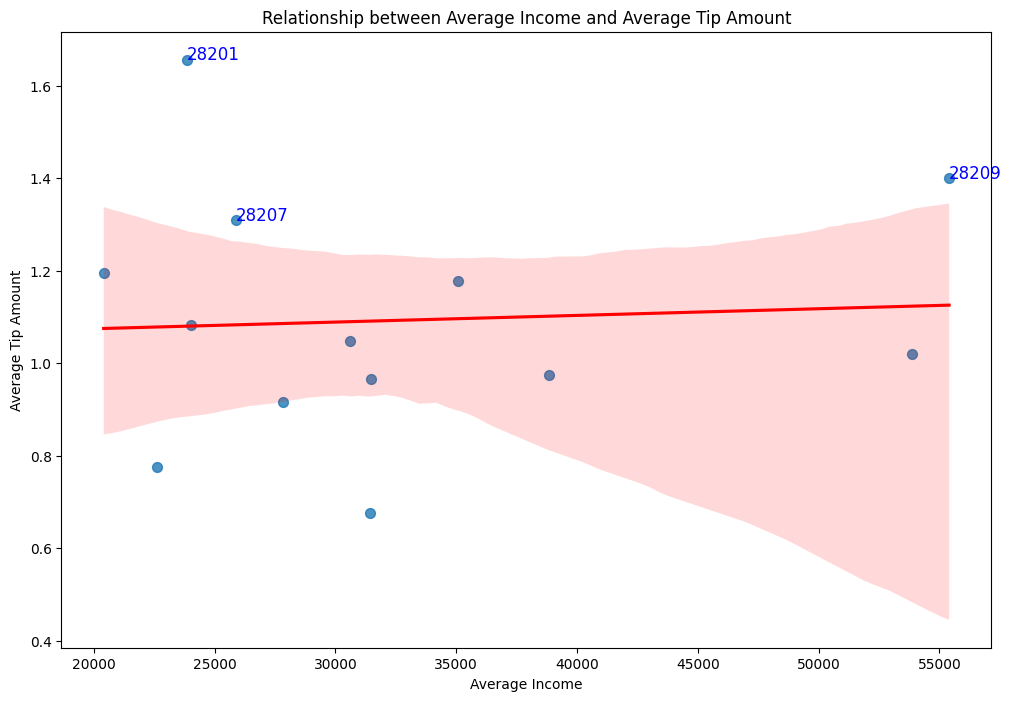

In [77]:
# Plotting the scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(x='Average Income', y='Tip Amount', data=merged_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Relationship between Average Income and Average Tip Amount')
plt.xlabel('Average Income')
plt.ylabel('Average Tip Amount')

# Highlight top three areas with highest tips
top_three_areas = merged_df.nlargest(3, 'Tip Amount')
for i, row in top_three_areas.iterrows():
    plt.text(row['Average Income'], row['Tip Amount'], row['Postal Code'], fontsize=12, color='blue')

plt.show()

The regression line indicates a slightly positve trend, suggesting that higher average income might be associated with slightly higher average tips. However, the confidence interval (shaded area) is quite wide, implying a lot of variability and uncertainty in this relationship.

Hence our hypothesis was proven wrong.

Tips v. Weather

In [78]:
# Descriptive statistics for tips by weather conditions
tips_by_weather = df.groupby('Weather Conditions')['Tip Amount'].mean().reset_index()
tips_by_weather

,Weather Conditions,Tip Amount
0,Cloudy,1.308511
1,Rainy,1.202381
2,Sunny,0.693750


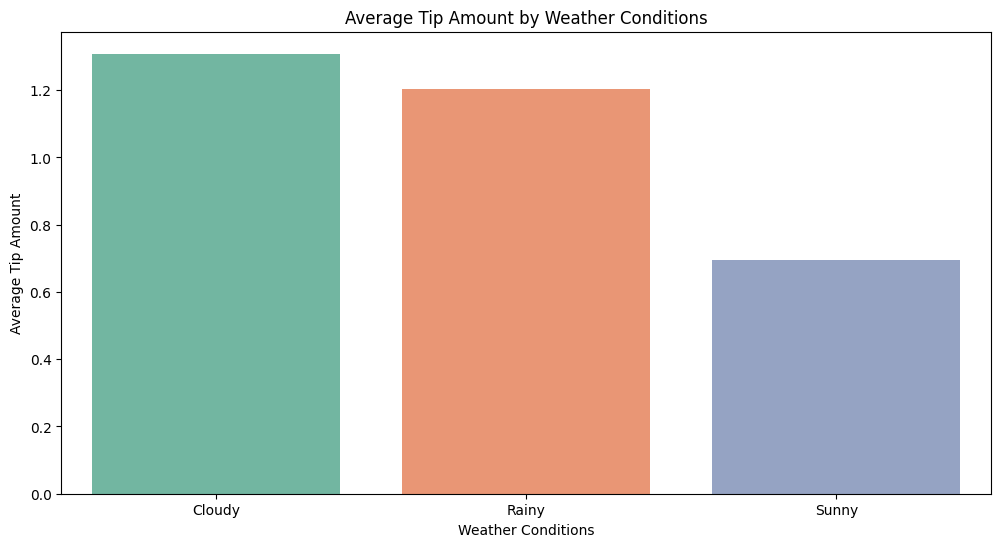

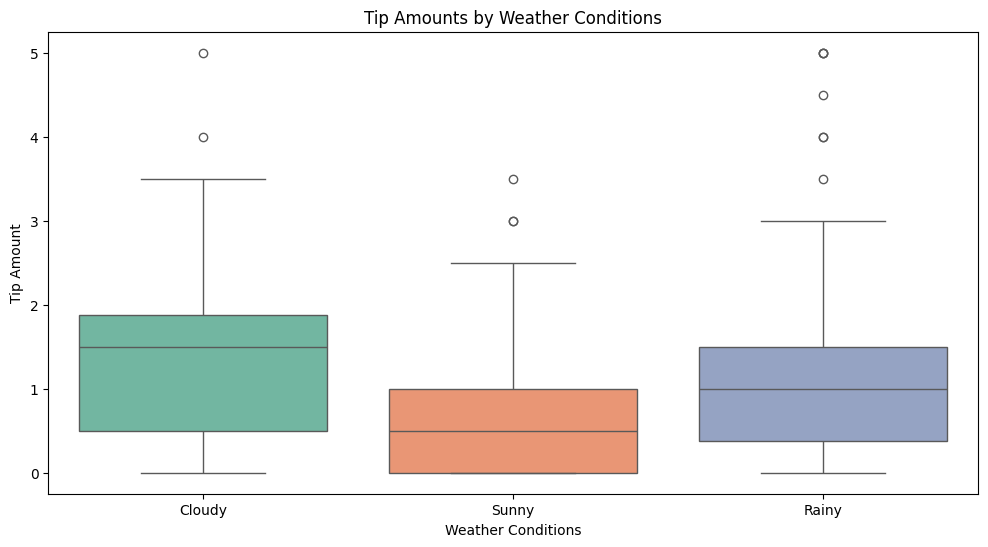

In [79]:
# Plotting the average tip amount by weather conditions
plt.figure(figsize=(12, 6))
sns.barplot(x='Weather Conditions', y='Tip Amount', data=tips_by_weather,hue='Weather Conditions', palette='Set2')
plt.title('Average Tip Amount by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Tip Amount')
plt.show()

# Boxplot to visualize the distribution of tip amounts across different weather conditions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather Conditions', y='Tip Amount', data=df, hue='Weather Conditions', palette='Set2')
plt.title('Tip Amounts by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Tip Amount')
plt.show()


In [80]:
import scipy.stats as stats

# Perform ANOVA test to check if there's a significant difference in tips across different weather conditions
anova_result = stats.f_oneway(
    df[df['Weather Conditions'] == 'Sunny']['Tip Amount'],
    df[df['Weather Conditions'] == 'Cloudy']['Tip Amount'],
    df[df['Weather Conditions'] == 'Rainy']['Tip Amount']
)

print(f"p-Value: {anova_result[1]}")


p-Value: 0.0002943692351900648


Since the p-value is less than the commonly used significance level of 0.05, we reject the null hypothesis. This indicates that there are statistically significant differences in tip amounts across different weather conditions.
The results suggest that weather conditions do indeed have a significant impact on the amount of tips received. Specifically, tips are likely to vary depending on whether it is sunny, cloudy, or rainy.

### Tips v. Order Price

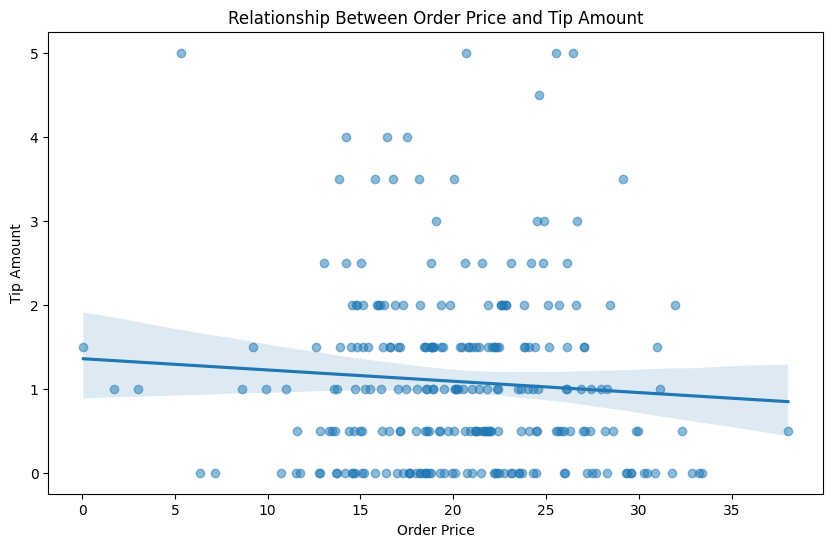

In [81]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Order Price', y='Tip Amount', data=df, scatter_kws={'alpha':0.5})
plt.title('Relationship Between Order Price and Tip Amount')
plt.xlabel('Order Price')
plt.ylabel('Tip Amount')
plt.show()


In [82]:
# Calculate the correlation coefficient
correlation = df['Order Price'].corr(df['Tip Amount'])
correlation


-0.07288846807432929

The correlation coefficient of -0.0417 indicates a very weak negative relationship between order price and tip amount. This suggests that there is almost no linear relationship between the order price and the tip amount.

# Model Training

In [83]:
df.head()

,Date,Tip Amount,Order Price,Weather Conditions,Area Code,Day of Week
0,2021-06-01,0.0,25.98,Cloudy,28203,Tuesday
1,2021-06-01,1.0,13.60,Sunny,28213,Tuesday
2,2021-06-01,2.0,16.27,Cloudy,28205,Tuesday
3,2021-06-01,1.0,26.06,Cloudy,28207,Tuesday
4,2021-06-01,0.0,20.72,Cloudy,28197,Tuesday


In [84]:
# Encoding categorical variables
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df = pd.get_dummies(df, columns=['Day of Week', 'Weather Conditions'])

# Display the first few rows of the prepared dataframe
df.head()


,Date,Tip Amount,Order Price,Area Code,Day of Week_Monday,Day of Week_Tuesday,Day of Week_Wednesday,Day of Week_Thursday,Day of Week_Friday,Day of Week_Saturday,Day of Week_Sunday,Weather Conditions_Cloudy,Weather Conditions_Rainy,Weather Conditions_Sunny
0,2021-06-01,0.0,25.98,28203,False,True,False,False,False,False,False,True,False,False
1,2021-06-01,1.0,13.60,28213,False,True,False,False,False,False,False,False,False,True
2,2021-06-01,2.0,16.27,28205,False,True,False,False,False,False,False,True,False,False
3,2021-06-01,1.0,26.06,28207,False,True,False,False,False,False,False,True,False,False
4,2021-06-01,0.0,20.72,28197,False,True,False,False,False,False,False,True,False,False


In [85]:
df_tips = df[['Tip Amount', 'Day of Week_Monday', 'Day of Week_Tuesday', 'Day of Week_Wednesday',
              'Day of Week_Thursday', 'Day of Week_Friday', 'Day of Week_Saturday', 'Day of Week_Sunday',
              'Weather Conditions_Cloudy', 'Weather Conditions_Rainy', 'Weather Conditions_Sunny']]

# Display the first few rows of the prepared dataframe
df_tips.head()

,Tip Amount,Day of Week_Monday,Day of Week_Tuesday,Day of Week_Wednesday,Day of Week_Thursday,Day of Week_Friday,Day of Week_Saturday,Day of Week_Sunday,Weather Conditions_Cloudy,Weather Conditions_Rainy,Weather Conditions_Sunny
0,0.0,False,True,False,False,False,False,False,True,False,False
1,1.0,False,True,False,False,False,False,False,False,False,True
2,2.0,False,True,False,False,False,False,False,True,False,False
3,1.0,False,True,False,False,False,False,False,True,False,False
4,0.0,False,True,False,False,False,False,False,True,False,False


In [86]:
# Define the features (X) and target (y)
X = df_tips.drop(columns=['Tip Amount'])
y = df_tips['Tip Amount']

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=150, random_state=42)

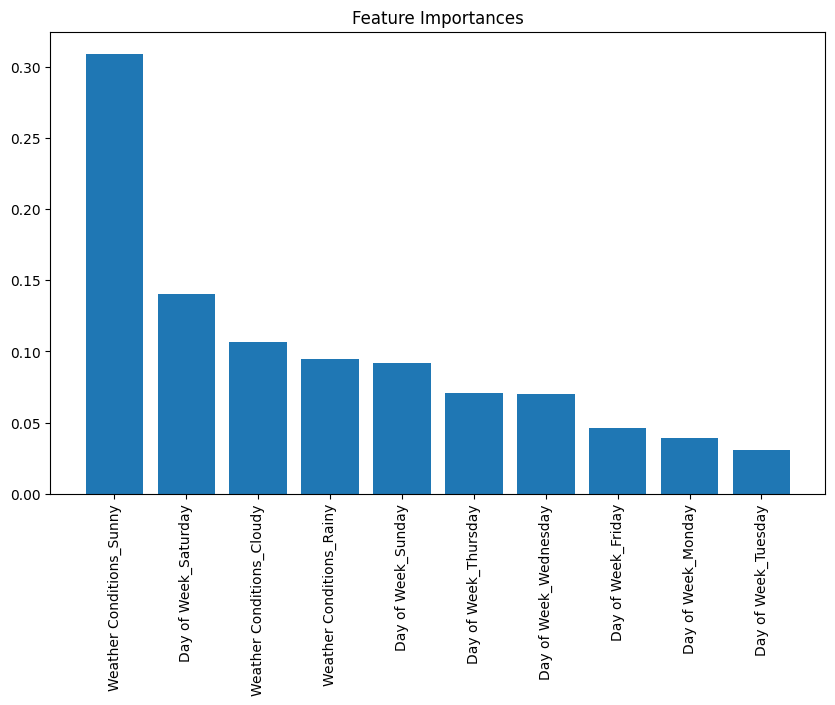

In [88]:
import numpy as np

# Fit your RandomForestRegressor model
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Get feature names (assuming X is a pandas DataFrame)
feature_names = X.columns

# Create a sorted list of feature importances and their corresponding feature names
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.show()


In [89]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.9869080475482408


In [90]:
def predict_tips(weather, day, model):
    # Create a sample with the correct features
    sample = {
        'Day of Week_Monday': [1 if day == 'Monday' else 0],
        'Day of Week_Tuesday': [1 if day == 'Tuesday' else 0],
        'Day of Week_Wednesday': [1 if day == 'Wednesday' else 0],
        'Day of Week_Thursday': [1 if day == 'Thursday' else 0],
        'Day of Week_Friday': [1 if day == 'Friday' else 0],
        'Day of Week_Saturday': [1 if day == 'Saturday' else 0],
        'Day of Week_Sunday': [1 if day == 'Sunday' else 0],
        'Weather Conditions_Cloudy': [1 if weather == 'Cloudy' else 0],
        'Weather Conditions_Rainy': [1 if weather == 'Rainy' else 0],
        'Weather Conditions_Sunny': [1 if weather == 'Sunny' else 0]
    }
    
    # Convert the sample to a DataFrame
    sample_df = pd.DataFrame(sample)
    
    # Predict the tip amount
    predicted_tip = model.predict(sample_df)
    return predicted_tip[0]



In [91]:
# Predict tips for each day with rainy weather
days_of_week = [
    'Monday', 
    'Tuesday', 
    'Wednesday', 
    'Thursday', 
    'Friday', 
    'Saturday', 
    'Sunday'
]

predicted_tips = {day: predict_tips('Sunny', day, model) for day in days_of_week}

# Determine the best day to work
best_day = max(predicted_tips, key=predicted_tips.get)
print(f'The best day to work for maximizing tips on a rainy day is: {best_day}')

The best day to work for maximizing tips on a rainy day is: Saturday


In [92]:
predicted_tips

{'Monday': 0.8837301587301588,
 'Tuesday': 0.6246306467608461,
 'Wednesday': 0.29664677588206995,
 'Thursday': 0.6361556273104261,
 'Friday': 0.5139942018765546,
 'Saturday': 1.088681935510883,
 'Sunday': 0.5387785555355888}

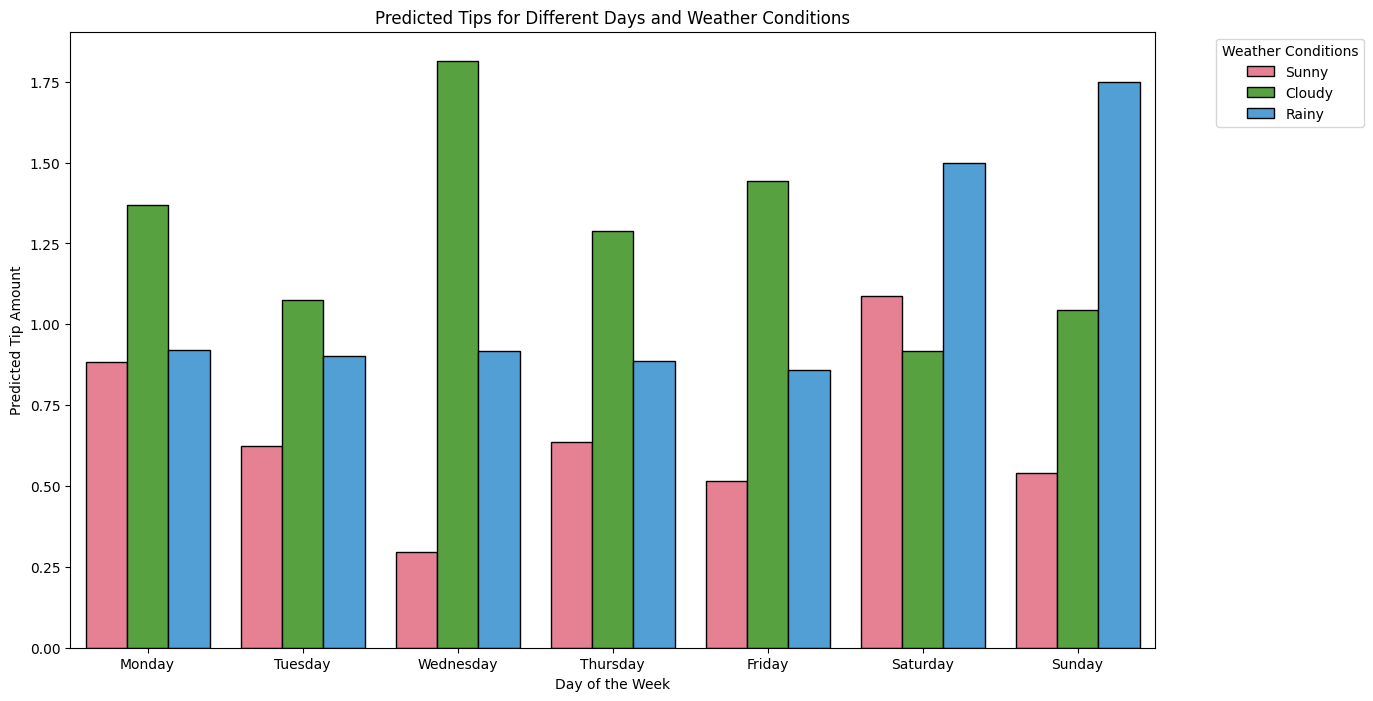

In [93]:
# Predict tips for each day with different weather conditions

weather_conditions = [
    'Sunny', 
    'Cloudy', 
    'Rainy'
]

# Collecting predictions
predictions = []
for day in days_of_week:
    for weather in weather_conditions:
        predicted_tip = predict_tips(weather, day, model)
        predictions.append({'Day': day, 'Weather': weather, 'Predicted Tip': predicted_tip})

# Convert predictions to a DataFrame for easier plotting
predictions_df = pd.DataFrame(predictions)

# Plotting the ranking of each day depending on the predicted tips based on the weather conditions
plt.figure(figsize=(14, 8))
sns.barplot(x='Day', y='Predicted Tip', hue='Weather', data=predictions_df, palette='husl', edgecolor='black')
plt.title('Predicted Tips for Different Days and Weather Conditions')
plt.xlabel('Day of the Week')
plt.ylabel('Predicted Tip Amount')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

In [94]:
import WeatherForecast
weather_list = WeatherForecast.getForecast()
weather_list

0     Rainy
1    Cloudy
2    Cloudy
3     Sunny
4    Cloudy
5     Rainy
6     Rainy
Name: weather_condition, dtype: object

In [95]:
import datetime

# Get today's date
today = datetime.date.today()

# Create a list with today's name as the first element
days_list = [today.strftime("%A")]

# Loop to get the next 6 days
for i in range(1, 7):
    next_day = today + datetime.timedelta(days=i)
    day_name = next_day.strftime("%A")
    days_list.append(day_name)

# Print the result
print(days_list)

['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']


In [96]:
predictions = []
for i in range(0,7):
    predicted_tip = predict_tips(weather_list[i], days_list[i], model)
    predictions.append({'Day': days_list[i], 'Weather': weather_list[i], 'Predicted Tip': predicted_tip})
predictions

[{'Day': 'Friday', 'Weather': 'Rainy', 'Predicted Tip': 0.8588991155902919},
 {'Day': 'Saturday', 'Weather': 'Cloudy', 'Predicted Tip': 0.9187892154142154},
 {'Day': 'Sunday', 'Weather': 'Cloudy', 'Predicted Tip': 1.0455424482924482},
 {'Day': 'Monday', 'Weather': 'Sunny', 'Predicted Tip': 0.8837301587301588},
 {'Day': 'Tuesday', 'Weather': 'Cloudy', 'Predicted Tip': 1.0739315548429325},
 {'Day': 'Wednesday', 'Weather': 'Rainy', 'Predicted Tip': 0.9168944556475517},
 {'Day': 'Thursday', 'Weather': 'Rainy', 'Predicted Tip': 0.8854596560846556}]

In [97]:
predictions.sort(key=lambda x: x['Predicted Tip'], reverse=True)

# Print the best three days
best_three_days = predictions[:3]
for day in best_three_days:
    print(f"Day: {day['Day']}, Weather: {day['Weather']}, Predicted Tip: {day['Predicted Tip']}")

Day: Tuesday, Weather: Cloudy, Predicted Tip: 1.0739315548429325
Day: Sunday, Weather: Cloudy, Predicted Tip: 1.0455424482924482
Day: Saturday, Weather: Cloudy, Predicted Tip: 0.9187892154142154
